# 0 - Progetto DataMining Fifa 20
 *Team:* 
           
            Natascia De Vico   
            Mattia Giglio
            Duilio Palmieri
            Giugeppe Verardi

**Kaggle Fifa 20** (https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset)

Dataset:

FIFA è una serie molto popolare di videogiochi di calcio, sviluppata e pubblicata da Arti Elettroniche (EA).

È probabilmente una delle serie di maggior successo nel settore dei videogiochi con vendita di milioni di copie in tutto il mondo.

Il gioco ha diverse modalità: ad esempio, partite amichevoli, tornei, partite online.
Tra queste modalità c'è anche la Fifa Ultimate Team Mode, dove l'utente può simulare l'intera carriera di un allenatore e dirigente calcistico di una squadra.

Secondo questa modalità di gioco, il giocatore umano, in quanto allenatore/direttore generale della squadra, ci si aspetta che prenda numerose decisioni, fondamentali per lo sviluppo e il progresso del suo team.
Una delle responsabilità chiave del direttore generale è decidere quali giocatori acquistare o vendere.

In questo contesto, sarebbe auspicabile disporre di un sistema guidato dai dati che aiuti il ​​direttore generale a prendere queste decisioni. Chiaramente, l'obiettivo di tale sistema sarebbe stimare correttamente il valore reale di mercato di ogni giocatore, in modo che il direttore generale della squadra possa prendere una decisione informata.

# 1 - Formally define the problem (DONE)
FIFA è un videogioco molto famoso. Fornisce dei parametri per i calciatori che seppur 'ideati' per il gioco sono molto vicini alla realtà da cui prendono spunto. Adopereremo pertanto i parametri disponibili per fornire un modello predittivo del valore di mercato di ogni giocatore come strumento di supporto alla decisione del manager durante la campagna acquisti sul gioco FIFA20 che potrà poi essere 'riallenato' o testato sui dati che di recente sono stati pubblicati per FIFA21.

# 2 - Overview - Piano di azione (DONE)
Siamo di fronte ad un tipico caso di "supervised learning" poichè la nostra label è il valore del calciatore (Value) da predire. Per farlo, dopo aver acquisito il dataset, andremo a trasformare la stringa del Value nel suo equivalente valore numerico in euro.
Si tratta inoltre di un tipico problema di regressione, poichè vogliamo predire un valore numerico.
In particolare si tratta di un problema di regressione multivariato poichè le features che contribuiscono al valore della label individuata sono tante.

Operativamente, dopo aver trasformato alcune variabili da formato stringa nell'equivalente valore numerico nel Sistema Internazionale di Misura provvederemo ad acquisire maggiore conoscenza nel dominio del dataset per meglio comprendere il problema. Commetteremo, volutamente, un errore di 'data snooping' ovvero rimanderemo poco più in la la divisione del dataset in train e test.

# 3 - Acquisire i dati (DONE)

In [66]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from math import sqrt
import scipy.stats
import sys

import  matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [67]:
#fonte dati fifa20 copiato su github
giocatoriFifa20='https://raw.githubusercontent.com/acalio/mds/main/Assignments/Fifa/data.csv'
#'https://raw.githubusercontent.com/natydevico/Dataset/master/fifa20/data.csv'
 
dfGiocatoriFifa20 = pd.read_csv(giocatoriFifa20)

# 4 - Discover and visualize the data to gain insights (DONE)

In [68]:
print(dfGiocatoriFifa20.shape)

(18207, 89)


In [69]:
dfGiocatoriFifa20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

Prendiamo nota del tipo di dato per Height, Weight, Value e Wage. Ci saremmo aspettati dati di tipo numerico ma in questo dataset sono stati rappresentati con unità di misura specifica nel testo. Saranno sicuramente oggetto di trasformazione nelle fasi successive. Vediamo inoltre la presenza di valori nulli nel dataset.

In [70]:
dfGiocatoriFifa20.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000

In [71]:

dfGiocatoriFifa20.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Per procedere alla visualizzazione del dato ed acquisirne maggiore conoscenza preferiamo procedere ad alcune trasformazioni che ci aiuteranno per una immediata conoscenza del dominio del dataset.

Trasformiamo l'altezza, espressa in pollici (string), in cm (numerico):

In [72]:
Height_cm = []
for i in list(dfGiocatoriFifa20['Height'].values):
    try:
        Height_cm.append(round((float(str(i)[0])*12.0 + float(str(i)[2:]))*2.54,0))
    except(ValueError):
        Height_cm.append(np.nan)
        
dfGiocatoriFifa20['Height_cm'] = Height_cm

Analogamente procediamo per il peso dei giocatori, da libre (string) trasformiamo in kg (numerico):

In [73]:
dfGiocatoriFifa20['Weight_kg'] = round(dfGiocatoriFifa20['Weight'].str[:3].astype(float)/2.20462,0)

In [74]:
#adding new column BMI to check the health and fitness of players
dfGiocatoriFifa20["BMI"] = dfGiocatoriFifa20['Weight_kg'] / (dfGiocatoriFifa20['Height_cm'] / 100) ** 2
dfGiocatoriFifa20.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Height_cm,Weight_kg,BMI
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887,181.179911,75.289003,22.909336
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119,6.691885,7.075511,1.409429
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,155.000000,50.000000,16.920033
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,175.000000,70.000000,22.068809
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,180.000000,75.000000,22.857143
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,185.000000,80.000000,23.766410
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,

Eseguiamo un grafico della distribuzione delle altezze dei giocatori.

Mean Height_cm:  181.179910788039
Standard Deviation in Height_cm:  6.691884731590987


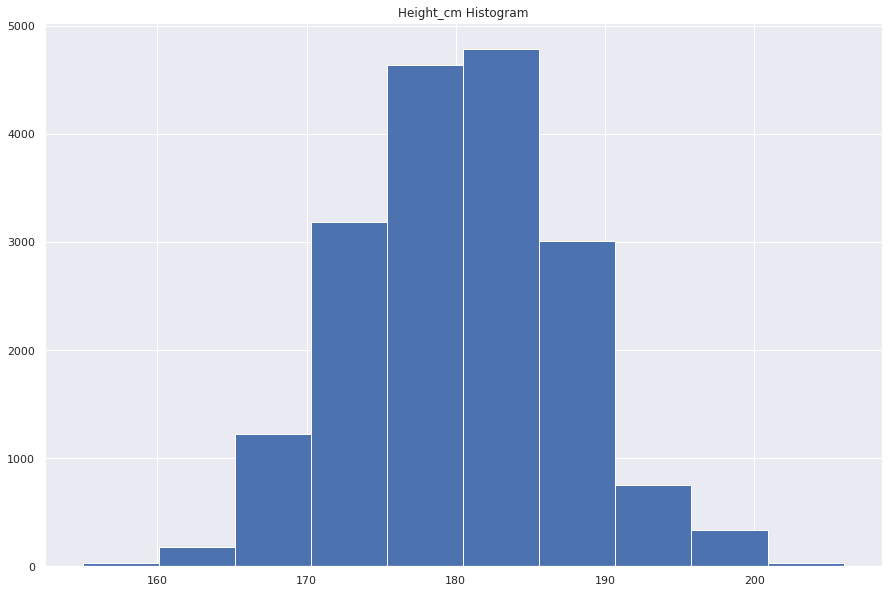

In [75]:
import seaborn as sns 
import matplotlib.pyplot as plt
def get_statistics(numeric_column_name):
    print("Mean {}: ".format(numeric_column_name),   dfGiocatoriFifa20[numeric_column_name].mean())
    print("Standard Deviation in {}: ".format(numeric_column_name), dfGiocatoriFifa20[numeric_column_name].std())
    sns.set()
    plt.title("{} Histogram".format(numeric_column_name))
    dfGiocatoriFifa20[numeric_column_name].hist(bins = 10)
    
get_statistics('Height_cm')

In [76]:
dfGiocatoriFifa20.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

Definiamo una funzione che riesce a trasformare i valori espressi per i campi Wage e Value (campi stringa) nei valori numerici equivalenti

In [77]:
def parse_money(s):
    if s.startswith('€'):
        s = s[1:]
    multiplier = None
    if s.endswith('M'):
        s = s[:-1]
        multiplier = 1e6
    elif s.endswith('B'):
        s = s[:-1]
        multiplier = 1e9
    elif s.endswith('K'):
        s = s[:-1]
        multiplier = 1e3
    f = float(s)
    if multiplier:
        f = f * multiplier
    return f

Sostituiamo nello stesso campo, sia per Value che per Wage, con il valore numerico richiamando la funzione definita:

In [78]:
dfGiocatoriFifa20['Value'] = dfGiocatoriFifa20['Value'].apply(parse_money)
dfGiocatoriFifa20['Wage'] = dfGiocatoriFifa20['Wage'].apply(parse_money)

## Conta giocatori per altezza

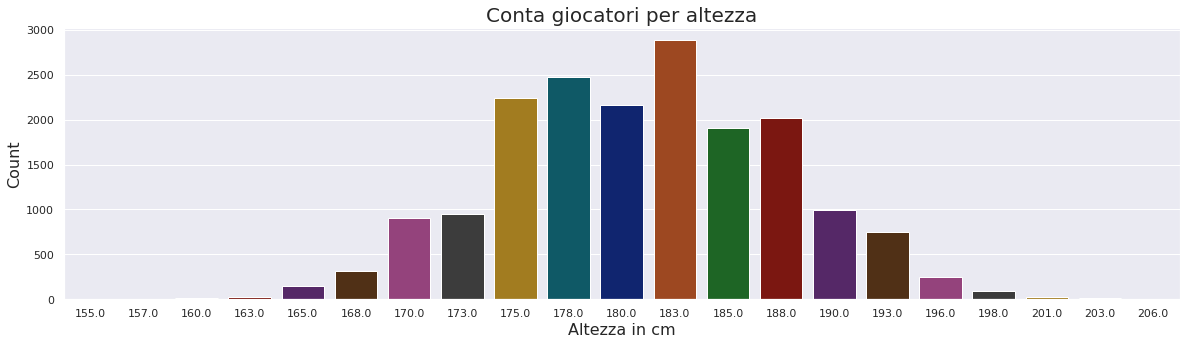

In [79]:
plt.figure(figsize = (20, 5))
ax = sns.countplot(x = 'Height_cm', data = dfGiocatoriFifa20, palette = 'dark')
ax.set_title(label = 'Conta giocatori per altezza', fontsize = 20)
ax.set_xlabel(xlabel = 'Altezza in cm', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

## Migliori giocatori basato su Overall scores

In [80]:
dfGiocatoriFifa20.iloc[dfGiocatoriFifa20.groupby(dfGiocatoriFifa20['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality','Overall']]

,Position,Name,Age,Club,Nationality,Overall
17,CAM,A. Griezmann,27,Atlético Madrid,France,89
12,CB,D. Godín,32,Atlético Madrid,Uruguay,90
20,CDM,Sergio Busquets,29,FC Barcelona,Spain,89
271,CF,Luis Alberto,25,Lazio,Spain,82
67,CM,Thiago,27,FC Bayern München,Spain,86
3,GK,De Gea,27,Manchester United,Spain,91
28,LAM,J. Rodríguez,26,FC Bayern München,Colombia,88
35,LB,Marcelo,30,Real Madrid,Brazil,88
24,LCB,G. Chiellini,33,Juventus,Italy,89
11,LCM,T. Kroos,28,Real Madrid,Germany,90


## Nazioni rappresentate

In [81]:
dfGiocatoriFifa20['Nationality'].unique()

array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'Croatia',
       'Uruguay', 'Slovenia', 'Poland', 'Germany', 'France', 'England',
       'Italy', 'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales',
       'Senegal', 'Costa Rica', 'Slovakia', 'Netherlands',
       'Bosnia Herzegovina', 'Morocco', 'Serbia', 'Algeria', 'Austria',
       'Greece', 'Chile', 'Sweden', 'Korea Republic', 'Finland', 'Guinea',
       'Montenegro', 'Armenia', 'Switzerland', 'Norway', 'Czech Republic',
       'Scotland', 'Ghana', 'Central African Rep.', 'DR Congo',
       'Ivory Coast', 'Russia', 'Ukraine', 'Iceland', 'Mexico', 'Jamaica',
       'Albania', 'Venezuela', 'Japan', 'Turkey', 'Ecuador', 'Paraguay',
       'Mali', 'Nigeria', 'Cameroon', 'Dominican Republic', 'Israel',
       'Kenya', 'Hungary', 'Republic of Ireland', 'Romania',
       'United States', 'Cape Verde', 'Australia', 'Peru', 'Togo',
       'Syria', 'Zimbabwe', 'Angola', 'Burkina Faso', 'Iran', 'Estonia',
       'Tunisia', 'Equato

## Prime 30 Nazioni maggiormente rappresentate

Numero di giocatori per nazione in ordine descrescente.

In [82]:
top_country = dfGiocatoriFifa20['Nationality'].value_counts().head(30)

top_country

England                1662
Germany                1198
Spain                  1072
Argentina               937
France                  914
Brazil                  827
Italy                   702
Colombia                618
Japan                   478
Netherlands             453
Sweden                  397
China PR                392
Chile                   391
Republic of Ireland     368
Mexico                  366
United States           353
Poland                  350
Norway                  341
Saudi Arabia            340
Denmark                 336
Korea Republic          335
Portugal                322
Turkey                  303
Austria                 298
Scotland                286
Belgium                 260
Australia               236
Switzerland             220
Uruguay                 149
Senegal                 130
Name: Nationality, dtype: int64

Grafico delle prime 30 nazioni con maggior numero di giocatori

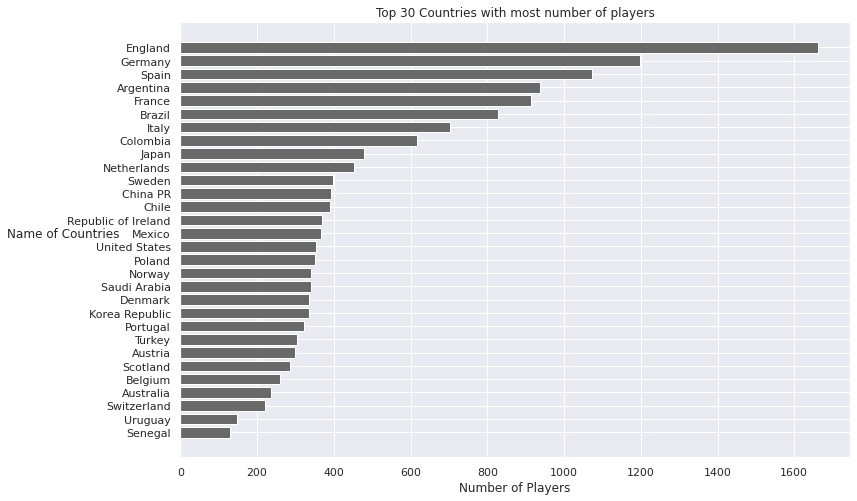

In [83]:
fig, ax = plt.subplots(figsize=(12,8))
x = top_country.values
y = top_country.index
ax.barh(y, x, align='center', color='dimgray')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Players')
ax.set_ylabel('Name of Countries', rotation=0)
ax.set_title('Top 30 Countries with most number of players')
plt.show()

## Punteggio complessivo per Nazione

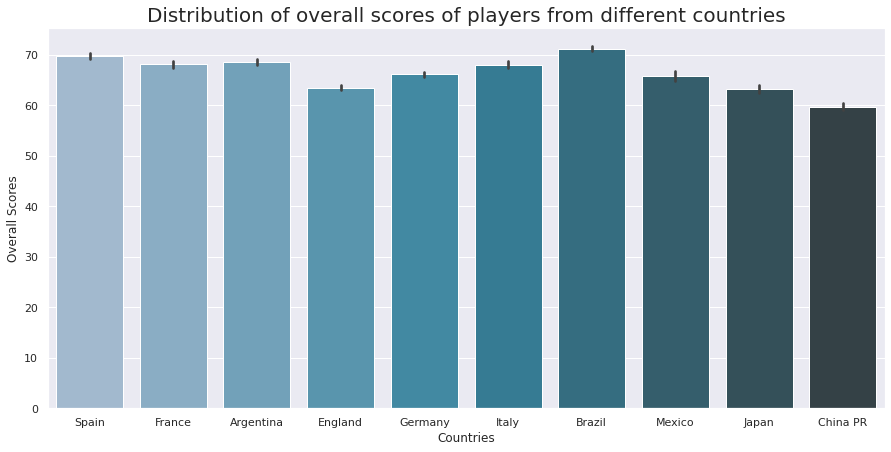

In [84]:
countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia', 'Japan', 'Mexico', 'China PR')
data_country= dfGiocatoriFifa20.loc[dfGiocatoriFifa20['Nationality'].isin(countries) & dfGiocatoriFifa20['Overall']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_country['Nationality'], y = data_country['Overall'], palette = 'PuBuGn_d')
ax.set_xlabel(xlabel = 'Countries', fontsize = 12)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 12)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()

## Top 20 Clubs by Total Player Value(Euro) of Fifa 20

In [85]:
import plotly.graph_objects as go

TopClubsInVal = dfGiocatoriFifa20[['Club', 'Value']]
TopClubsInVal = TopClubsInVal.set_index(n for n in range(TopClubsInVal.shape[0]))
TopClubsInVal = pd.DataFrame(TopClubsInVal.groupby('Club')['Value'].sum()).sort_values('Value', ascending = False).head(20)

fig = go.Figure(
        data = [go.Bar(y = TopClubsInVal['Value'],
                       x = TopClubsInVal.index)],
        layout_title_text = "Top 20 Clubs by Total Player Value(Euro) of Fifa 20"
        
)
fig.update_traces(marker_color='green')

fig.show() 

## Top 30 Most Valued Players (Euro)

In [86]:
most_valued = dfGiocatoriFifa20[['Name','Value', 'Club', 'Nationality']]
most_valued = most_valued.set_index(n for n in range(most_valued.shape[0]))
most_valued = most_valued.sort_values('Value', ascending = False).head(30)

fig = go.Figure(
        data = [go.Bar(y = most_valued['Value'],
                       x = most_valued['Name'])],
                       
        
        layout_title_text = 'Highest Valued Players of Fifa 20'
)
fig.show()

## Most Preferred Foot of the Players

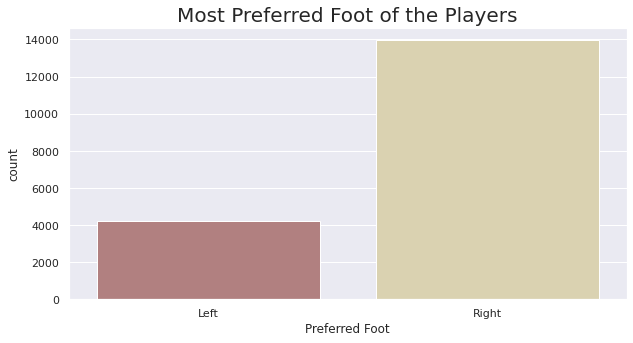

In [87]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(x=dfGiocatoriFifa20['Preferred Foot'], palette = 'pink')
plt.title('Most Preferred Foot of the Players', fontsize = 20)
plt.show()

## Migliori portieri di Fifa 20

In [88]:
GK = dfGiocatoriFifa20[dfGiocatoriFifa20['Position'] == 'GK']
GK = GK[['Name','Club', 'Nationality', 'Overall', 'Potential']]

GK = GK.sort_values('Overall', ascending = False).head(20)

fig = go.Figure(
        data = [go.Bar(y = GK['Overall'],
                       x = GK['Name'])],
        layout_title_text = "Migliori portieri di Fifa 20"
)
fig.update_traces(marker_color='goldenrod')
fig.show()

Age e Potential sono correlate negativamente. Ovviamente i giocatori giovani hanno maggiore potenziale.

## Word Cloud Nationality

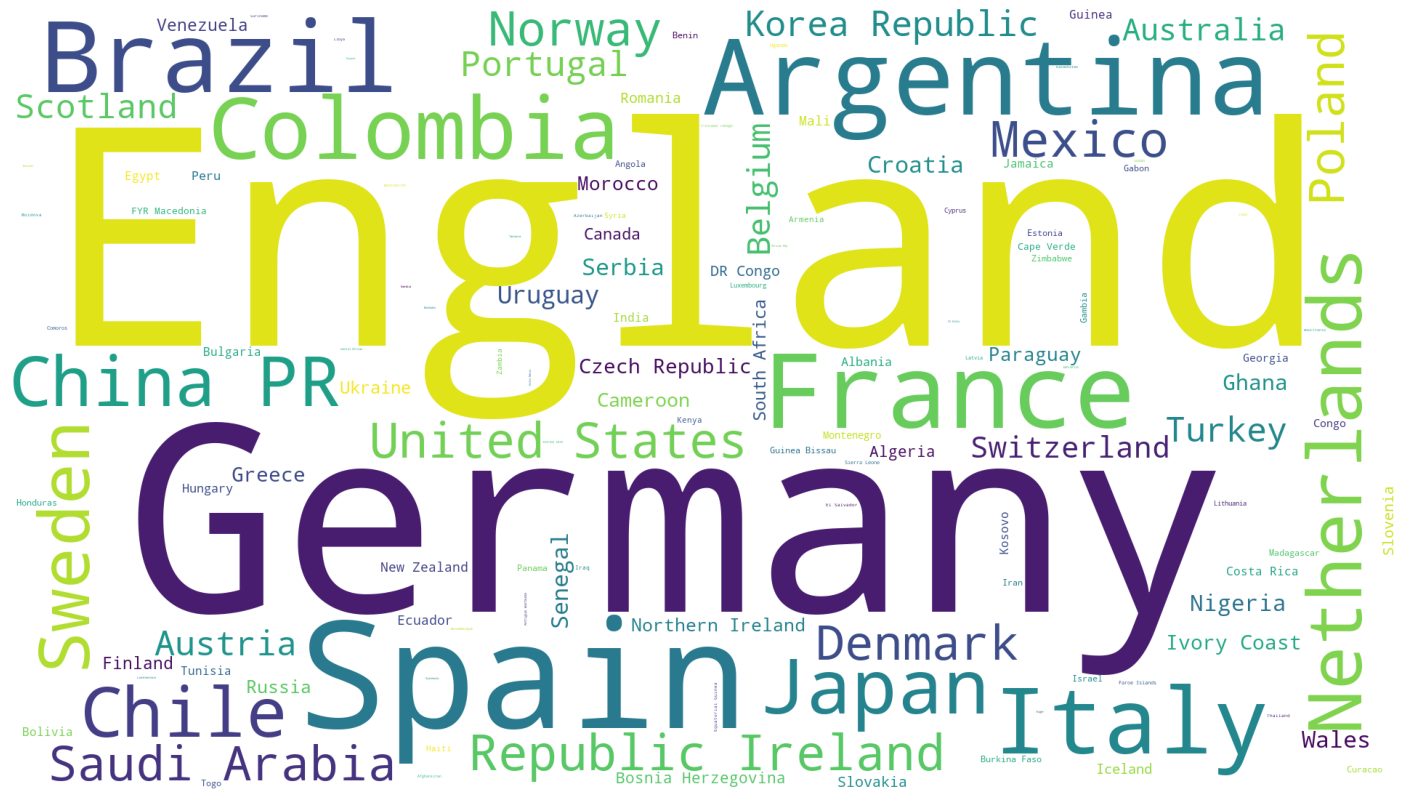

In [89]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(dfGiocatoriFifa20.Nationality))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# 5 - Preprocessing (DOING)

## Features selection

Selezioniamo le variabili che sono di interesse per la nostra analisi nella determinazione del Valore dei giocatori.

Per eseguire questa selezione le tecniche sono tante: analisi correlazione, PCA, etc.
Per ora eseguiamo una selezione ragionata con l'aiuto delle correlazioni più importanti ma cercando di limitarle in numero; ritorneremo su questo passaggio successivamente per migliorarla ulteriormente qualora gli indicatori di bontà del modello non siano buoni.

In [90]:
df1 = dfGiocatoriFifa20
#.drop('Unnamed: 0,Name,Photo,Nationality,Flag,Club,Club Logo,Jersey Number,Joined,Real Face,Loaned From,Release Clause'.split(','), axis=1)
#df1.head()

corr_matrix = df1.corr()
corr_matrix["Value"].sort_values(ascending=False)

Value                       1.000000
Wage                        0.858442
International Reputation    0.653176
Overall                     0.627085
Potential                   0.576218
Reactions                   0.540552
Composure                   0.450352
Special                     0.377738
Vision                      0.357639
ShortPassing                0.327623
Skill Moves                 0.315651
BallControl                 0.308818
LongPassing                 0.302175
Volleys                     0.288243
Curve                       0.287235
ShotPower                   0.281360
LongShots                   0.279730
Dribbling                   0.272004
FKAccuracy                  0.265773
Positioning                 0.259391
Finishing                   0.256665
Crossing                    0.249785
Penalties                   0.239033
Stamina                     0.210721
Agility                     0.194259
Aggression                  0.184639
HeadingAccuracy             0.184437
S

In [91]:
df1[['Work Rate1', 'Work Rate2']] = df1['Work Rate'].str.split('/', expand=True)
df1 = df1.drop('Work Rate', axis=1)
df1[['Work Rate1', 'Work Rate2']].head()

,Work Rate1,Work Rate2
0,Medium,Medium
1,High,Low
2,High,Medium
3,Medium,Medium
4,High,High


Selezioniamo le prime 6 variabili più importanti per la correlazione e ne aggiungiamo alcune di interesse. Ad esempio la variabile BMI meglio è correlata rispetto alle due variabili originali Altezza e Peso del calciatore

In [92]:
df1 = dfGiocatoriFifa20[['Age','BMI','Overall','Potential',
          'Value','Wage','Position','Preferred Foot','International Reputation',
          'Work Rate1','Work Rate2','Composure','Reactions']]
print(df1.isnull().sum())
#df1

Age                          0
BMI                         48
Overall                      0
Potential                    0
Value                        0
Wage                         0
Position                    60
Preferred Foot              48
International Reputation    48
Work Rate1                  48
Work Rate2                  48
Composure                   48
Reactions                   48
dtype: int64


## Analisi correlazioni

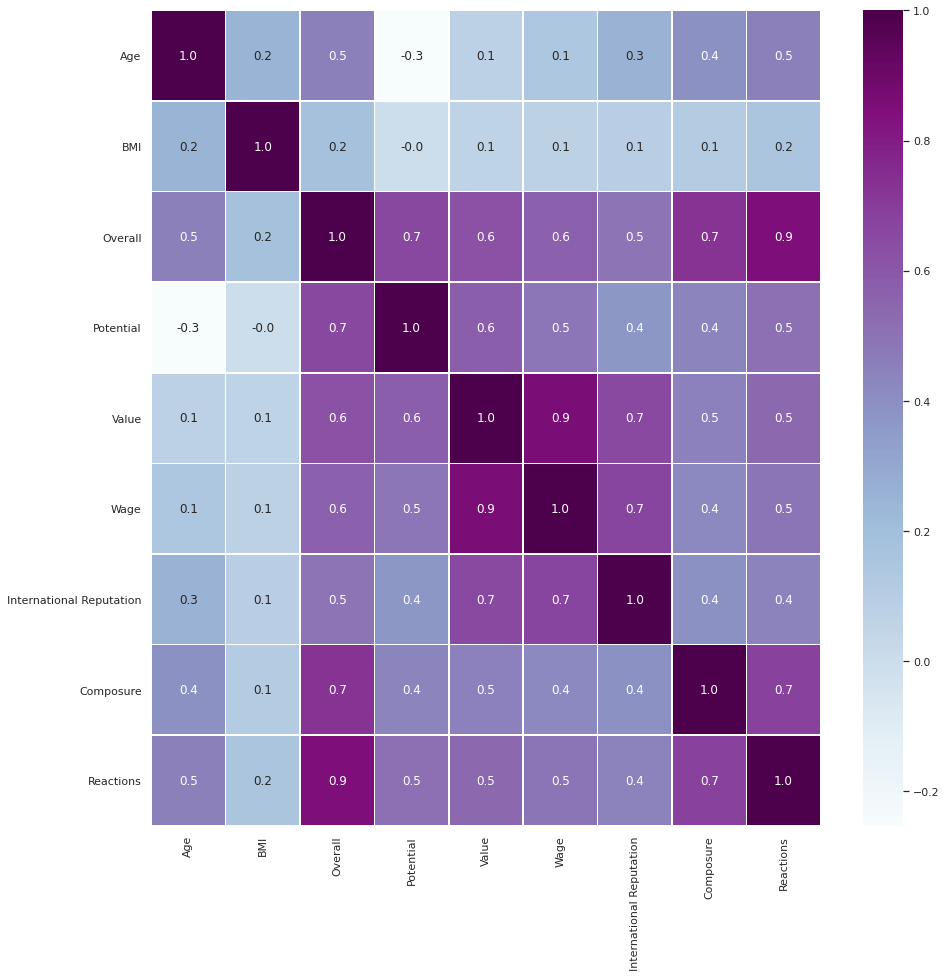

In [93]:
#Correlation map
f,ax = plt.subplots(figsize = (15,15))
sns.heatmap(df1.corr(),annot = True,linewidths=.5,fmt = '.1f',ax=ax, cmap="BuPu")
plt.show()

Siamo interessati alla variabile target Value. La matrice di correlazione mette in evidenza l'influenza sulla variabile target di alcuni campi, come atteso, ovvero Overall, Potential ed International Reputation. Consideriamo l'alta correlazione tra Value e Wage ovvia, poichè un calciatore avrà sicuramente un salario commisurato al suo valore.

Dividiamo il dataset selezionato in train e test. Lo facciamo in questo momento pur essendo consapevoli di un possibile effetto di 'data snooping'. Avremmo dovuto farlo ben prima ma volevamo acquisire maggiori competenze sul dominio dei dati osservandolo nella sua interezza:

In [94]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df1, test_size=0.2, random_state=42)

Dividiamo quindi le Xs (features) dalle ys (variabile target Value):

In [95]:
player = train_set.drop("Value", axis=1) # drop labels for training set
player_labels = train_set["Value"].copy()

## Missing Data 

In [96]:
player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14565 entries, 17472 to 15795
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       14565 non-null  int64  
 1   BMI                       14531 non-null  float64
 2   Overall                   14565 non-null  int64  
 3   Potential                 14565 non-null  int64  
 4   Wage                      14565 non-null  float64
 5   Position                  14520 non-null  object 
 6   Preferred Foot            14531 non-null  object 
 7   International Reputation  14531 non-null  float64
 8   Work Rate1                14531 non-null  object 
 9   Work Rate2                14531 non-null  object 
 10  Composure                 14531 non-null  float64
 11  Reactions                 14531 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.4+ MB


Visualizziamo diversamente i valori nulli presenti. Ci occuperemo di gestirli all'interno delle pipeline che andremo a disegnare a breve.

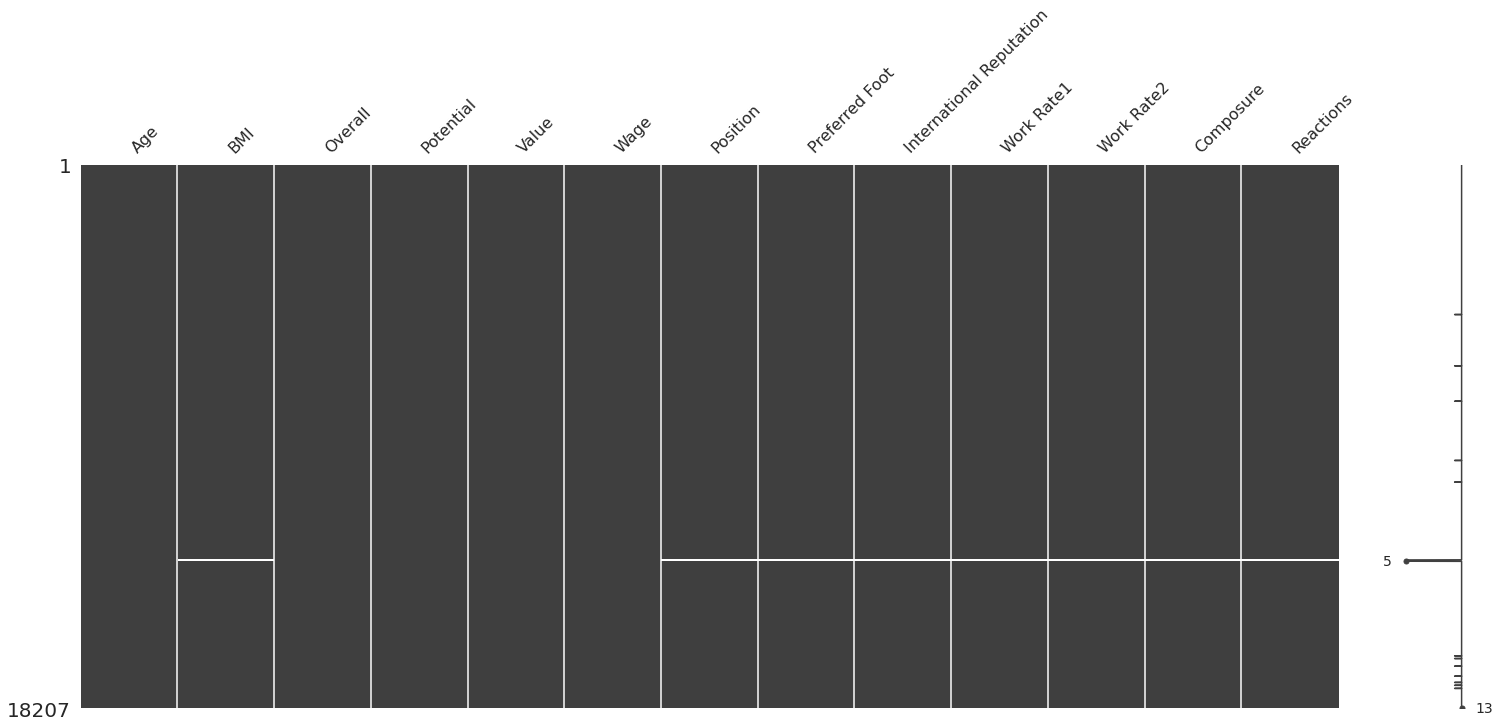

In [97]:
import missingno as msno
msno.matrix(df1)

## Prove di imputer che saranno utilizzati nelle pipeline

Suddividiamo le features in numeriche e categoriali:

In [98]:
player_num = player.select_dtypes(exclude=['object', 'category'])
player_cat = player.select_dtypes('object', 'category')

In [99]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer_num = SimpleImputer(strategy="median")
imputer_cat = SimpleImputer(strategy="most_frequent")

Eseguiamo l'addestramento dell'imputer per i campi numerici:

In [100]:
imputer_num.fit(player_num)
imputer_num.statistics_

array([2.50000000e+01, 2.28571429e+01, 6.60000000e+01, 7.10000000e+01,
       3.00000000e+03, 1.00000000e+00, 6.00000000e+01, 6.20000000e+01])

Eseguiamo adesso la trasformazione applicando l'imputer addestrato:

In [101]:
X = imputer_num.transform(player_num)
player_tr = pd.DataFrame(X, columns=player_num.columns,
                          index = list(player.index.values))

In [102]:
player_tr

,Age,BMI,Overall,Potential,Wage,International Reputation,Composure,Reactions
17472,19.0,22.530864,54.0,66.0,1000.0,1.0,42.0,47.0
5971,20.0,22.992624,69.0,80.0,13000.0,1.0,70.0,70.0
10264,30.0,22.205990,65.0,65.0,4000.0,1.0,52.0,59.0
176,24.0,25.469388,83.0,89.0,165000.0,3.0,72.0,70.0
3780,21.0,22.530864,72.0,83.0,3000.0,1.0,67.0,64.0
...,...,...,...,...,...,...,...,...
11284,24.0,25.617284,64.0,67.0,2000.0,1.0,65.0,61.0
11964,23.0,23.888441,64.0,72.0,1000.0,1.0,66.0,51.0
5390,21.0,25.082863,70.0,76.0,17000.0,1.0,65.0,66.0
860,30.0,24.074074,78.0,78.0,30000.0,2.0,71.0,77.0


Procediamo analogamente per i missing value delle features categoriali:

In [103]:
#player_cat = player.select_dtypes(include=['object'])
player_cat.head(10)

,Position,Preferred Foot,Work Rate1,Work Rate2
17472,CB,Right,Medium,Medium
5971,RCB,Right,Medium,High
10264,CB,Right,Medium,Medium
176,LCM,Right,High,High
3780,LM,Right,Medium,Medium
2358,ST,Right,High,Low
9656,RM,Right,High,High
2231,RM,Right,Medium,Medium
15178,RB,Right,Medium,Medium
14934,CB,Right,Medium,Medium


In [104]:
df1.isnull().sum()

Age                          0
BMI                         48
Overall                      0
Potential                    0
Value                        0
Wage                         0
Position                    60
Preferred Foot              48
International Reputation    48
Work Rate1                  48
Work Rate2                  48
Composure                   48
Reactions                   48
dtype: int64

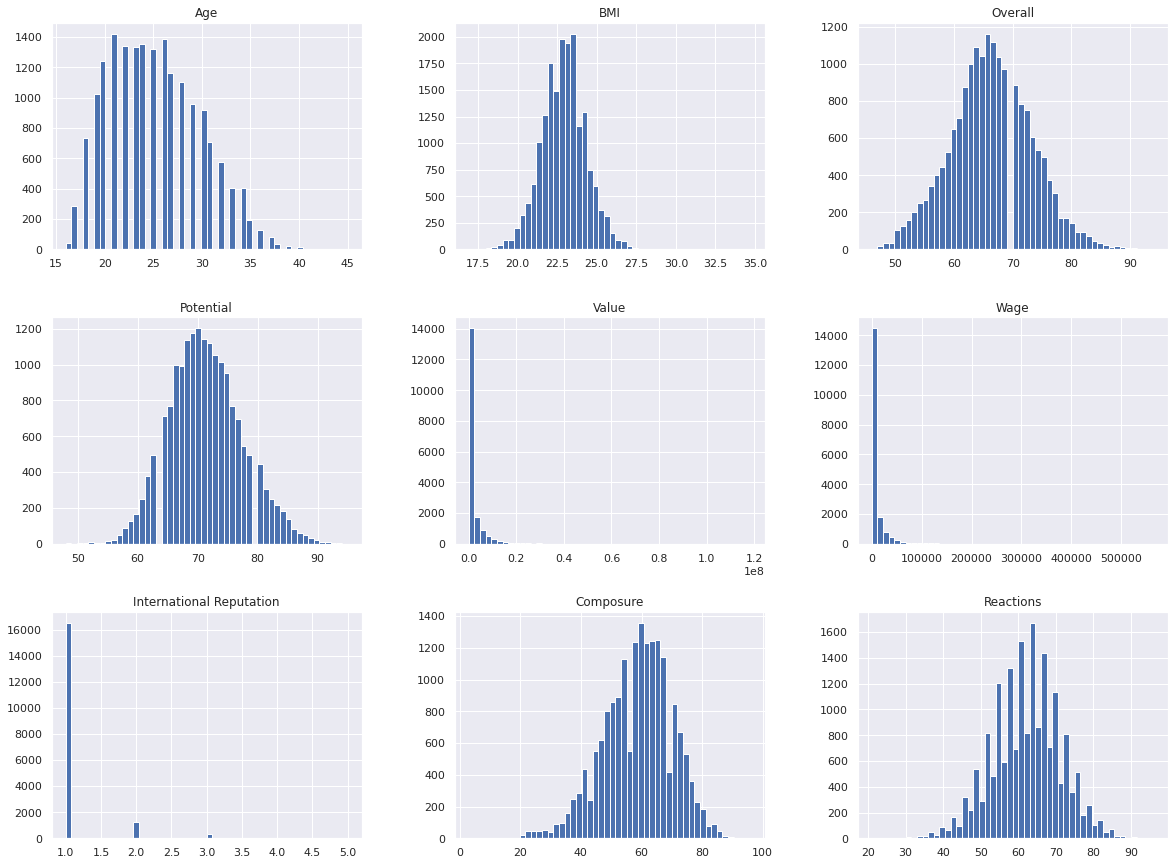

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt

df1.hist(bins=50, figsize=(20,15))
plt.show()



In [106]:
df1.isnull().sum()

Age                          0
BMI                         48
Overall                      0
Potential                    0
Value                        0
Wage                         0
Position                    60
Preferred Foot              48
International Reputation    48
Work Rate1                  48
Work Rate2                  48
Composure                   48
Reactions                   48
dtype: int64

## Pipeline

In [107]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer_num', SimpleImputer(strategy="median")),
       # ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])


player_num_tr = num_pipeline.fit_transform(player_num)


In [108]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20


try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20


In [109]:
num_attribs = player_num.columns
cat_attribs = player_cat.columns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
#cat_selector = DataFrameSelector(player_cat.columns)
ohe = OneHotEncoder(sparse=False)
cat_pipeline = Pipeline([
    ('imputer_cat', SimpleImputer(strategy="most_frequent")),
   # ('selector', cat_selector),
    ('ohe', ohe)
])


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs)
        ,("cat", cat_pipeline, cat_attribs)        
    ])

player_prepared = full_pipeline.fit_transform(player)

# 6 - Addestramento Modelli (DOING)

Definiamo una funzione che calcola e scrive i principali indicatori di errore per i modelli calcolati

In [110]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def print_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Mean Squared error : %s" % mean_squared_error(y_test, y_pred))
    print("Mean Absolute error : %s" % mean_absolute_error(y_test, y_pred))
    print("R2 Score: %s" % r2_score(y_test, y_pred))
    print("Root Mean Squared Error Score: %s" % np.sqrt(mean_squared_error(y_test, y_pred)))

## Linear Regression

In [111]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(player_prepared, player_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Abbiamo affestrato il modello di Regressione Lineare. Verifichiamone la bontà con gli score:

In [112]:

print_metrics(lin_reg, player_prepared, player_labels)

Mean Squared error : 6629295517967.157
Mean Absolute error : 1317432.7095130517
R2 Score: 0.7901641458610329
Root Mean Squared Error Score: 2574741.8352073976


## DecisionTree Regressor

In [113]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(player_prepared, player_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

Misuriamo l'errore commesso con questo modello

In [114]:
print_metrics(tree_reg, player_prepared, player_labels)

Mean Squared error : 316683.8311019567
Mean Absolute error : 9.268795056642636
R2 Score: 0.9999999899760658
Root Mean Squared Error Score: 562.7466846654512


Questo modello è decisamente migliore rispetto al primo.

Eseguiamo il test di precisione dei modelli con la cross validation

In [115]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Std.: ", scores.std())

In [116]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, player_prepared, player_labels,
scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print_scores(rmse_scores)

Scores: [1089288.6721416   769126.00033583 1149982.54291307 1570543.58040606
 1510941.39817418 1279844.57895918 1862396.63866154 1686815.76100438
 1123917.89380074  945825.94981062]
Mean:  1298868.3016207207
Std.:  330026.6381182219


In [117]:
lin_scores = cross_val_score(lin_reg, player_prepared, player_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
print_scores(lin_rmse_scores)

Scores: [2889579.66156624 2141438.34163352 2603979.97291382 2368293.57333879
 2559527.47162843 2389601.4380859  2937148.18313428 2813661.92990382
 2588813.42595361 2579009.02027775]
Mean:  2587105.3018436157
Std.:  234939.9518195164


## Altri modo di addestrare algoritmi e trovare il migliore osservando gli score

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
models = [LinearRegression(),SGDRegressor(), DecisionTreeRegressor(), LinearSVR(), AdaBoostRegressor(), 
          GradientBoostingRegressor(), RandomForestRegressor(), MLPRegressor()]

for model in models:
    print(f"Running model {type(model)}")
    model.fit(player_prepared,player_labels)
    print_metrics(model,player_prepared, player_labels)
    print("------------------------")

Running model <class 'sklearn.linear_model._base.LinearRegression'>
Mean Squared error : 6629295517967.157
Mean Absolute error : 1317432.7095130517
R2 Score: 0.7901641458610329
Root Mean Squared Error Score: 2574741.8352073976
------------------------
Running model <class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'>
Mean Squared error : 6752125038894.22
Mean Absolute error : 1256156.4844511787
R2 Score: 0.7862762459526104
Root Mean Squared Error Score: 2598485.1430966887
------------------------
Running model <class 'sklearn.tree._classes.DecisionTreeRegressor'>
Mean Squared error : 316683.8311019567
Mean Absolute error : 9.268795056642636
R2 Score: 0.9999999899760658
Root Mean Squared Error Score: 562.7466846654512
------------------------
Running model <class 'sklearn.svm._classes.LinearSVR'>
Mean Squared error : 37294916867589.99
Mean Absolute error : 2389168.526818106
R2 Score: -0.18048904513948538
Root Mean Squared Error Score: 6106956.432429332
----------------------

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Il migliore sembra essere il DecisionTreeRegressor

# 7 - Fine Tune the model (DOING)

## GridSearch

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(player_prepared, player_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

Visualizziamo i migliori hyperparam individuati

In [120]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

E' possibile anche adoperare direttamente il modello migliore addestrato:

In [121]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [122]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2126451.9386277557 {'max_features': 2, 'n_estimators': 3}
1824147.6944454121 {'max_features': 2, 'n_estimators': 10}
1688584.0262515135 {'max_features': 2, 'n_estimators': 30}
1971955.1073431752 {'max_features': 4, 'n_estimators': 3}
1581070.8455973552 {'max_features': 4, 'n_estimators': 10}
1394046.9088781797 {'max_features': 4, 'n_estimators': 30}
1627367.8103128476 {'max_features': 6, 'n_estimators': 3}
1328039.172323664 {'max_features': 6, 'n_estimators': 10}
1200154.9038098394 {'max_features': 6, 'n_estimators': 30}
1492802.4417737776 {'max_features': 8, 'n_estimators': 3}
1183674.0124413287 {'max_features': 8, 'n_estimators': 10}
1133808.4366949233 {'max_features': 8, 'n_estimators': 30}
2046643.4148852462 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1723156.754921779 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
2048434.2699168797 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1593605.3405608176 {'bootstrap': False, 'max_features': 3, 'n_e

In [123]:
pd.DataFrame(grid_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.053893,0.010467,0.005133,0.001043,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-6.079847e+12,-4.630435e+12,-4.205731e+12,-4.288473e+12,-3.404503e+12,-4.521798e+12,8.765848e+11,18,-1.826872e+12,-1.177747e+12,-1.433600e+12,-1.238040e+12,-1.148266e+12,-1.364905e+12,2.514708e+11
1,0.152167,0.004918,0.012116,0.001681,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-4.117617e+12,-2.828324e+12,-3.117118e+12,-3.481861e+12,-3.092654e+12,-3.327515e+12,4.464754e+11,14,-7.245804e+11,-5.988412e+11,-8.014091e+11,-7.617282e+11,-7.477052e+11,-7.268528e+11,6.870502e+10
2,0.441879,0.006722,0.030946,0.001764,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.820331e+12,-2.406524e+12,-2.654610e+12,-3.430183e+12,-2.944933e+12,-2.851316e+12,3.409822e+11,11,-4.753895e+11,-4.362348e+11,-5.221367e+11,-4.470734e+11,-4.705529e+11,-4.702775e+11,2.970833e+10
3,0.055735,0.001932,0.004255,0.000063,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.526581e+12,-4.304701e+12,-3.037651e+12,-5.668999e+12,-2.905103e+12,-3.888607e+12,1.016405e+12,15,-9.677717e+11,-1.263150e+12,-1.011324e+12,-1.147662e+12,-1.163499e+12,-1.110681e+12,1.074234e+11
4,0.172982,0.003365,0.010973,0.000134,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.357805e+12,-2.420382e+12,-1.938358e+12,-4.130528e+12,-1.651852e+12,-2.499785e+12,8.625517e+11,8,-5.894374e+11,-5.331720e+11,-5.057651e+11,-5.403144e+11,-5.157739e+11,-5.368925e+11,2.898767e+10


## Randomized Search

In [62]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(player_prepared, player_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [63]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1123980.4884339934 {'max_features': 7, 'n_estimators': 180}
1425804.4987476477 {'max_features': 5, 'n_estimators': 15}
1447651.5673749188 {'max_features': 3, 'n_estimators': 72}
1375579.622555711 {'max_features': 5, 'n_estimators': 21}
1123259.1133670523 {'max_features': 7, 'n_estimators': 122}
1442316.134801659 {'max_features': 3, 'n_estimators': 75}
1434177.301714062 {'max_features': 3, 'n_estimators': 88}
1249491.4387105452 {'max_features': 5, 'n_estimators': 100}
1434075.1074534906 {'max_features': 3, 'n_estimators': 150}
2125022.928594533 {'max_features': 5, 'n_estimators': 2}


## Evaluate Model on the Test Set

In [64]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("Value", axis=1)
y_test = test_set["Value"].copy()

X_test_prepared = full_pipeline.transform(X_test) #!!!!!!!!! do not call fit or fit_transform!
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [65]:
final_rmse

1091176.049204811

# 8 - Ensemble Learning (DOING)

Trattandosi di problema di regressione adoperiamo il modello Random Forest che è un classico caso di ensemble learning per la regressione.

# x - Analisi aggiuntive da eliminare

In [124]:
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [126]:
cols = ['BMI', 'Overall']

df_test = df1[cols]


x = df_test['BMI']
y = df_test['Overall']
# Generate indicators for the data points
obj_names = []
for i in range(len(df1)):
    obj = "Object " + str(i)
    obj_names.append(obj)

data = pd.DataFrame({
    'Object': obj_names,
    'X_value': x,
    'Y_value': y
})

print(df1.head())

   Age        BMI  Overall  ...  Work Rate2  Composure  Reactions
0   31  24.913495       94  ...      Medium       96.0       95.0
1   33  23.483477       94  ...         Low       95.0       96.0
2   26  22.204082       92  ...      Medium       94.0       94.0
3   27  20.403232       91  ...      Medium       68.0       90.0
4   27  21.604938       91  ...        High       88.0       91.0

[5 rows x 13 columns]


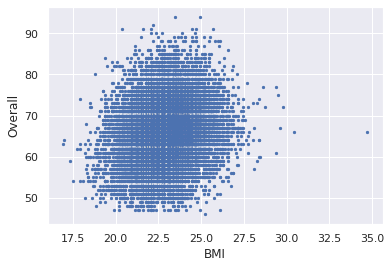

In [127]:
plt.scatter(x, y, s = 5)
plt.xlabel('BMI')
plt.ylabel('Overall')
plt.show()

In [128]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans

# Specify the number of clusters (3) and fit the data x,y which is in df_test
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_test)

ValueError: ignored

In [ ]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(x, y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.title('Data points and cluster centroids')
plt.show()

In [ ]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(df_test, kmeans.labels_))

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

'''

X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

'''

# print(X.shape)
# print(y.shape)


X = df_test
y = kmeans.labels_

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X['Height_cm'], X['Overall'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()